In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.optimize

# visualization
from tregs.mpl_pboc import plotting_style

import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import font_manager

plt.rcParams.update({'font.size': 12})
plotting_style()

{'green': '#7AA974',
 'light_green': '#BFD598',
 'pale_green': '#DCECCB',
 'yellow': '#EAC264',
 'light_yellow': '#F3DAA9',
 'pale_yellow': '#FFEDCE',
 'blue': '#738FC1',
 'light_blue': '#A9BFE3',
 'pale_blue': '#C9D7EE',
 'red': '#D56C55',
 'light_red': '#E8B19D',
 'pale_red': '#F1D4C9',
 'purple': '#AB85AC',
 'light_purple': '#D4C2D9',
 'dark_green': '#7E9D90',
 'dark_brown': '#905426'}

In [9]:
def simple_repression(
    m,
    epsilon_R,
    epsilon_P,
    delta_epsilon_R,
    delta_epsilon_P,
    R,
    P,
    l_R,
    l_P):
  return R/P * np.exp(-(epsilon_R + m * l_R * delta_epsilon_R)) / np.exp(-(epsilon_P + m * l_P * delta_epsilon_P))

def simple_repression_zero(
    m,
    epsilon_R,
    epsilon_P,
    delta_epsilon_R,
    delta_epsilon_P,
    R,
    P,
    l_R,
    l_P):
  return simple_repression(m, epsilon_R, epsilon_P, delta_epsilon_R, delta_epsilon_P, R, P, l_R, l_P) - 1


## Vary Copy numbers

In [10]:
np.concatenate(([np.arange(1, 10), np.arange(10, 20)]))

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])

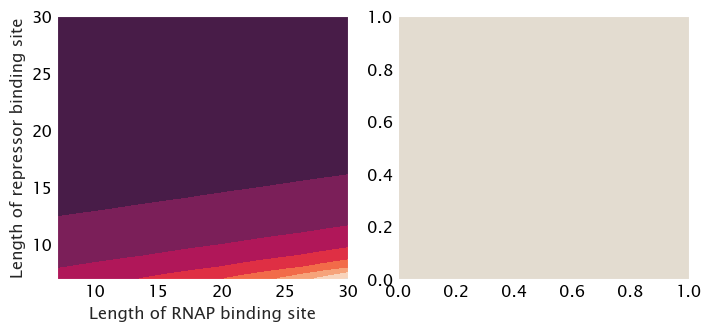

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(7, 3.2), layout='compressed')

l_R = np.arange(7, 31, 1)
l_P = np.arange(7, 31, 1)
z =  -1 * np.ones([len(l_R), len(l_P)])
for i, lr in enumerate(l_R):
  for j, lp in enumerate(l_P):
    if simple_repression(0, -15, -5, 2.24, 0.36, 10, 5000, lr, lp) > 1:
      x, r = scipy.optimize.brentq(simple_repression_zero, 0, 1, args=(-15, -5, 2.24, 0.36, 10, 5000, lr, lp), full_output=1, disp=False)
      if r.converged:
        z[i, j] = x

cset = ax[0].contourf(l_P, l_R, z, origin="lower",
                      extent=(1, l_P.max(), 1, l_R.max()),
                      levels=[-0.05, 0.05, 0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0.75])
#cbar = fig.colorbar(cset, ax=ax, label='mutation rate', )
#cbar.ax.set_yticks([0.05, 0.1, 0.15, 0.2, 0.25, 0.3])  # horizontal colorbar
ax[0].set_ylabel("Length of repressor binding site")
ax[0].set_xlabel("Length of RNAP binding site")

ax[0].set_ylim(l_R.min(), l_R.max())
ax[0].set_xlim(l_P.min(), l_P.max())
ax[0].scatter([5000], [10], marker='x',color='white')
ax[0].grid(False)

In [12]:
np.logspace(-1, 0.5, 100)

array([0.1       , 0.10355034, 0.10722672, 0.11103363, 0.1149757 ,
       0.11905772, 0.12328467, 0.12766169, 0.13219411, 0.13688745,
       0.14174742, 0.14677993, 0.15199111, 0.1573873 , 0.16297508,
       0.16876125, 0.17475284, 0.18095715, 0.18738174, 0.19403442,
       0.2009233 , 0.20805675, 0.21544347, 0.22309244, 0.23101297,
       0.23921471, 0.24770764, 0.25650209, 0.26560878, 0.27503878,
       0.28480359, 0.29491507, 0.30538555, 0.31622777, 0.32745492,
       0.33908067, 0.35111917, 0.36358509, 0.37649358, 0.38986037,
       0.40370173, 0.4180345 , 0.43287613, 0.44824469, 0.46415888,
       0.48063809, 0.49770236, 0.51537247, 0.53366992, 0.552617  ,
       0.57223677, 0.5925531 , 0.61359073, 0.63537526, 0.65793322,
       0.68129207, 0.70548023, 0.73052715, 0.75646333, 0.78332032,
       0.81113083, 0.83992871, 0.869749  , 0.90062802, 0.93260335,
       0.96571391, 1.        , 1.03550337, 1.07226722, 1.11033632,
       1.149757  , 1.19057724, 1.23284674, 1.27661695, 1.32194

In [13]:
d_eps_R_range = np.linspace(1, 4, 100)
d_eps_P_range = np.linspace(0.1, 0.8, 100)
z =  -1 * np.ones([len(d_eps_R_range), len(d_eps_P_range)])
for i, d_eps_R in enumerate(d_eps_R_range):
  for j, d_eps_P in enumerate(d_eps_P_range):
    if simple_repression(0, -15, -5, d_eps_R, d_eps_P, 10, 5000, 20, 20) > 1:
      x, r = scipy.optimize.brentq(simple_repression_zero, 0, 1, args=(-15, -5, d_eps_R, d_eps_P, 10, 5000, 20, 20), disp=False, full_output=1)
      if r.converged:
        z[i, j] = x


cset = ax[1].contourf(d_eps_P_range, d_eps_R_range, z, origin="lower",
                      extent=(d_eps_P_range.min(), d_eps_P_range.max(), d_eps_R_range.min(), d_eps_R_range.max()), levels=[-0.05, 0.05, 0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0.75])
#cbar = fig.colorbar(cset, ax=ax, label='mutation rate', )
#cbar.ax[1].set_yticks([0.05, 0.1, 0.15, 0.2, 0.25, 0.3])  # horizontal colorbar
ax[1].set_ylabel(r"$\Delta\Delta\varepsilon_\mathrm{rd}\:(k_BT)$")
ax[1].set_xlabel(r"$\Delta\Delta\varepsilon_\mathrm{pd}\:(k_BT)$")
#ax[1].scatter([-5], [-15], marker='x',color='white')
ax[1].grid(False)

In [14]:
#plt.tight_layout()
cbar = fig.colorbar(cset, ax=ax, label='Optimal mutation rate', )
cbar.ax.set_yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7])
cbar.ax.set_position([0.77, 0.01, 0.02, 1])  # [left, bottom, width, height]
#plt.subplots_adjust(right=10, wspace=10, hspace=10)

fig.savefig("../plots/size_information_content.pdf", bbox_inches='tight')